### Linear Regression with PyTorch

Training and evaluating a linear regression model for the prediction of a student's grade considering hours studied and previous grade

Specs:

- Graphing the data in 3D.
- Carrying out the definition of the architecture using both the high and medium level interfaces.
- Making a prediction with your trained model for the qualification that a student would have if we know that he studied for 12 hours for the exam and in a previous exam he obtained a qualification of 3.

In [104]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision.datasets.utils as vutils
from torch.utils.data import DataLoader
from torchvision.datasets.utils import download_url
SEED = 0
torch.manual_seed(SEED)

In [105]:
df=pd.read_csv('./data/grades.csv',names=['previous grade','hours of study','grade'])
df.head(5)

,previous grade,hours of study,grade
0,5.638,8.289,5.136
1,6.744,9.389,5.931
2,5.136,10.060,5.484
3,5.748,10.421,6.524
4,7.136,10.434,6.770


### Data 3D Graph

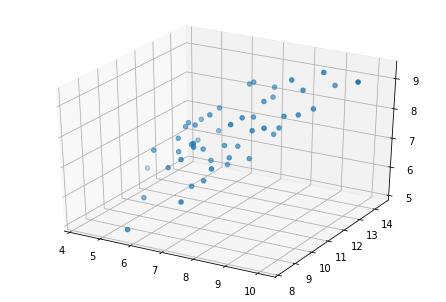

In [127]:
x_trn = np.array(df.iloc[:,:2], dtype="float32")
x_plot = np.array(df.iloc[:,0], dtype="float32")[..., np.newaxis]
x_plot_2 = np.array(df.iloc[:,1], dtype="float32")[..., np.newaxis]
y_trn = np.array(df.iloc[:,-1], dtype="float32")[..., np.newaxis]
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(x_plot, x_plot_2, y_trn)
plt.show()

### Data Pipelines

DataSet

In [107]:
class CalifDS:
    def __init__(self, X, Y):
        self.x = X
        self.y = Y

    def __getitem__(self, i):
        return self.x[i], self.y[i]

    def __len__(self):
        return len(self.y)

DataLoader

In [108]:
# tamaño del lote
batch_size = 16

# creamos un Dataset
ds = CalifDS(x_trn, y_trn)

# creamos un DataLoader
trn_dl = DataLoader(ds, batch_size=batch_size, shuffle=True)

# desplegamos un lote de imágenes
for x, y in take(trn_dl, 1):
    print(f'x shape={x.shape} dtype={x.dtype}')
    print(f'y shape={y.shape} dtype={y.dtype}')

x shape=torch.Size([16, 2]) dtype=torch.float32
y shape=torch.Size([16, 1]) dtype=torch.float32


### Model

High Level

In [109]:
model = nn.Sequential(
    nn.Linear(2, 1)
)
print(model)

Sequential(
  (0): Linear(in_features=2, out_features=1, bias=True)
)


Medium Level

In [110]:
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.fc = nn.Linear(2, 1)

    def forward(self, x):
        return self.fc(x)

model = Model()
print(model)

Model(
  (fc): Linear(in_features=2, out_features=1, bias=True)
)


### Training 

In [136]:
opt = optim.SGD(model.parameters(), lr=0.005)
loss_hist = []
EPOCHS = 2
for _ in range(EPOCHS):
    for x, y_true in trn_dl:
        y_lgts = model(x)
        loss = F.mse_loss(y_lgts, y_true)
        opt.zero_grad()
        loss.backward()
        opt.step()
        loss_hist.append(loss.item() * 100)

print(loss_hist)

[39.340394735336304, 38.779619336128235, 64.58343863487244, 52.68842577934265, 22.253064811229706, 16.485989093780518, 17.522266507148743, 4.525383561849594]


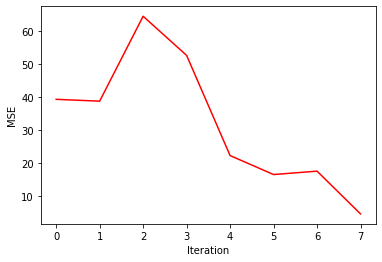

In [137]:
plt.plot(loss_hist, color='red')
plt.xlabel('Iteration')
plt.ylabel('MSE');

### Optimized Parameters

In [138]:
[w, b] = model.parameters()
print(f'W = {w}')
print(f'b = {b}')

W = Parameter containing:
tensor([[0.2357, 0.4296]], requires_grad=True)
b = Parameter containing:
tensor([0.1465], requires_grad=True)


### Prediction

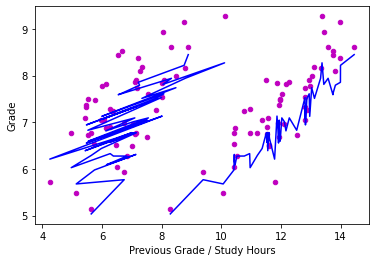

In [139]:
x_train = torch.from_numpy(x_trn)

with torch.no_grad():
    y_pred = model(x_train).numpy()

plt.plot(x_trn, y_trn, '.', color='m', markersize=9)
plt.plot(x_trn, y_pred, color='blue')
plt.xlabel('Previous Grade / Study Hours')
plt.ylabel('Grade');

Considering a student with 2.0 as previous grade but studied for 20 hours:

In [148]:
x = torch.tensor([[2.0,20.0]])

with torch.no_grad():
    y_pred = model(x).numpy()

print("The Grade will be:", y_pred[0][0])

The Grade will be: 9.209556
